## Trabalho Final Python para Jornalistas I
Grupo de trabalho: 
- Fábio Fleury: fabiofleury@gmail.com 
- Nicolás Llano: llano.nicolas@gmail.com. <br>

**Fonte:** Portal de Dados Abertos do TSE<br>
**[Base de dados 2018](https://dadosabertos.tse.jus.br/dataset/eleitorado-2018)**<br>
**[Base de dados 2014](https://dadosabertos.tse.jus.br/dataset/eleitorado-2014)**

### Objetivos: 
-Explorar os conjuntos de dados abertos do TSE<br>
-Selccionar um assunto/tópico para explorar em profundidade<br>
-Realizar uma análise exploratória<br>
-Articular possibilidades de pautas e pesquisas a partir da análise exploratória<br>
-Fazer uso das bibliotecas e funcionalidades do Python (Pandas, Matplotlib, Seaborn e outras) aprendidas e praticadas durante a disciplina

In [1]:
# Importando bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from IPython.display import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
imagem_url = "https://tenor.com/view/lets-go-dwight-schrute-rainn-wilson-the-office-come-on-gif-16882574.gif"
Image(url=imagem_url, width=300)

### Perfil dos eleitores com deficiência no Brasil

A partir de uma revisão dos conjuntos de dados disponíveis pelo TSE, decidimos focar nossa pesquisa exploratória no perfil do eleitorado com deficiência, usando as bases de dados das duas últimas eleições presidencias (2014, 2018). A exploração do perfil foi feita com os dados de 2018 com o objetivo de evitar desvios analíticos pela duplicidade de dados, mas revisamos inicialmente as duas bases com o objetivo de entender padrões temporais (e praticar a criação de um dataframe unificado).<br><br>
Segundo a Pesquisa Nacional de Saúde realizada pelo Ministério da Saúde, realizada em 2019, 8.4% da população nacional ["tem deficiência em pelo menos uma de suas funções"](https://www.pns.icict.fiocruz.br/painel-de-indicadores-mobile-desktop/). Já no Censo de 2010 (IBGE), as informações revelaram que 24% da população (46 milhões de pessoas) tinha ["pelo menos alguma dificuldade em uma ou mais questões por tipo de deficiência](https://www2.camara.leg.br/atividade-legislativa/comissoes/comissoes-permanentes/cpd/arquivos/cinthia-ministerio-da-saude).

Durante a campanha presidencial de 2018, o então candidato Jair Bolsonaro fez [7 promesas](https://g1.globo.com/politica/eleicoes/2018/noticia/2018/10/23/saiba-mais-sobre-as-promessas-de-bolsonaro-e-haddad-para-a-saude.ghtml) de campanha dirigidas à população com deficiência. Bolsonaro se reuniu com integrantes do Comitê Brasileiro de Organizações Representativas das Pessoas com Deficiência (CRPD) entre os dois turnos eleitorais, e assinou uma carta de compromisso.<br><br> 
Para a população com deficiência, o discurso feito em Libras (Língua Brasileira de Sinais)pela primeira-dama Michelle Bolsonaro na cerimônia da posse presidencial, reforçou as promesas e compromissos assumidos pelo governo Bolsonaro com essa faixa da população. Segundo o presidente do CRPD, Moisés Bauer Luiz, até 2020, Bolsonaro só tinha cumprido [1 das 7 promesas realizadas](https://www.correiobraziliense.com.br/app/noticia/politica/2020/01/01/interna_politica,817598/bolsonaro-so-cumpriu-uma-das-7-promessas-que-fez-a-pessoas-com-deficie.shtml).

Neste trabalho queremos explorar o perfil do eleitorado com deficiência e pensar em possíveis desdobramentos.

### Preparando as bases de dados 

In [3]:
# Carregando os dados de 2014
AC_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_AC.csv", encoding='latin-1', sep=';')
AL_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_AL.csv", encoding='latin-1', sep=';')
AM_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_AM.csv", encoding='latin-1', sep=';')
AP_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_AP.csv", encoding='latin-1', sep=';')
BA_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_BA.csv", encoding='latin-1', sep=';')
CE_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_CE.csv", encoding='latin-1', sep=';')
DF_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_DF.csv", encoding='latin-1', sep=';')
ES_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_ES.csv", encoding='latin-1', sep=';')
GO_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_GO.csv", encoding='latin-1', sep=';')
MA_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_MA.csv", encoding='latin-1', sep=';')
MG_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_MG.csv", encoding='latin-1', sep=';')
MS_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_MS.csv", encoding='latin-1', sep=';')
MT_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_MT.csv", encoding='latin-1', sep=';')
PA_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_PA.csv", encoding='latin-1', sep=';')
PB_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_PB.csv", encoding='latin-1', sep=';')
PE_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_PE.csv", encoding='latin-1', sep=';')
PI_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_PI.csv", encoding='latin-1', sep=';')
PR_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_PR.csv", encoding='latin-1', sep=';')
RJ_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_RJ.csv", encoding='latin-1', sep=';')
RN_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_RN.csv", encoding='latin-1', sep=';')
RO_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_RO.csv", encoding='latin-1', sep=';')
RR_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_RR.csv", encoding='latin-1', sep=';')
RS_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_RS.csv", encoding='latin-1', sep=';')
SC_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_SC.csv", encoding='latin-1', sep=';')
SE_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_SE.csv", encoding='latin-1', sep=';')
SP_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_SP.csv", encoding='latin-1', sep=';')
TO_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_TO.csv", encoding='latin-1', sep=';')
ZZ_2014 = pd.read_csv("dados_2014/perfil_eleitor_deficiencia_2014_ZZ.csv", encoding='latin-1', sep=';')

In [4]:
# Criando lista com todos os arquivos de dados do 2014
dados_2014 = [AL_2014, AM_2014, AP_2014, BA_2014, CE_2014, DF_2014, ES_2014, 
              GO_2014, MA_2014, MG_2014, MS_2014, MT_2014, PA_2014, PB_2014, 
              PE_2014, PI_2014, PR_2014, RJ_2014, RN_2014, RO_2014, RR_2014, 
              RS_2014, SC_2014, SE_2014, SP_2014, TO_2014, ZZ_2014]

In [5]:
# Criando um dataframe inicial, juntando os dados separados dos estados de 2014
perfil_2014 = pd.concat(dados_2014)

In [6]:
# Revisando as informações, valores e tipos do dataframe
perfil_2014.info()
perfil_2014.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459302 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   DT_GERACAO             459302 non-null  object
 1   HH_GERACAO             459302 non-null  object
 2   ANO_ELEICAO            459302 non-null  int64 
 3   SQ_ELEITOR             459302 non-null  int64 
 4   SG_UF                  459302 non-null  object
 5   CD_MUNICIPIO           459302 non-null  int64 
 6   NM_MUNICIPIO           459302 non-null  object
 7   CD_MUN_SIT_BIOMETRICA  459302 non-null  int64 
 8   DS_MUN_SIT_BIOMETRICA  459302 non-null  object
 9   NR_ZONA                459302 non-null  int64 
 10  NR_SECAO               459302 non-null  int64 
 11  CD_GENERO              459302 non-null  int64 
 12  DS_GENERO              459302 non-null  object
 13  CD_ESTADO_CIVIL        459302 non-null  int64 
 14  DS_ESTADO_CIVIL        459302 non-null  object
 15  CD_F

(459302, 22)

In [7]:
# Eliminando colunas
perfil_2014.drop(["DT_GERACAO", "NR_SECAO", "HH_GERACAO", "CD_MUN_SIT_BIOMETRICA", "DS_MUN_SIT_BIOMETRICA",
                 "NR_ZONA", "CD_ESTADO_CIVIL", "CD_FAIXA_ETARIA", "CD_GRAU_ESCOLARIDADE", 
                 "ST_ELEITOR_BIOMETRIA", "CD_TIPO_DEFICIENCIA","CD_MUNICIPIO", "CD_GENERO"],axis=1, inplace=True)

In [8]:
# Revisando colunas disponíveis após mudanças no dataframe
perfil_2014.columns

Index(['ANO_ELEICAO', 'SQ_ELEITOR', 'SG_UF', 'NM_MUNICIPIO', 'DS_GENERO',
       'DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE',
       'DS_TIPO_DEFICIENCIA'],
      dtype='object')

In [9]:
# Renomeando colunas
perfil_2014.rename(
    columns={"ANO_ELEICAO":"ano", "SQ_ELEITOR":"codigo_eleitor", "SG_UF":"uf", 
             "NM_MUNICIPIO":"municipio", "DS_GENERO": "genero", "DS_ESTADO_CIVIL":"estado_civil",
             "DS_FAIXA_ETARIA": "faixa_etaria", "DS_GRAU_ESCOLARIDADE":"escolaridade",
             "DS_TIPO_DEFICIENCIA": "deficiencia"}, inplace=True)

In [10]:
perfil_2014.head()

,ano,codigo_eleitor,uf,municipio,genero,estado_civil,faixa_etaria,escolaridade,deficiencia
0,2014,953928491,AL,MACEIÓ,MASCULINO,SOLTEIRO,30 a 34 anos,ENSINO FUNDAMENTAL INCOMPLETO,OUTROS
1,2014,974198406,AL,MACEIÓ,MASCULINO,SOLTEIRO,30 a 34 anos,ENSINO FUNDAMENTAL INCOMPLETO,OUTROS
2,2014,917205386,AL,MACEIÓ,FEMININO,SOLTEIRO,50 a 54 anos,ANALFABETO,OUTROS
3,2014,975923338,AL,ANADIA,FEMININO,CASADO,35 a 39 anos,ANALFABETO,DEFICIÊNCIA VISUAL
4,2014,904384809,AL,ANADIA,MASCULINO,SOLTEIRO,45 a 49 anos,ANALFABETO,OUTROS


In [11]:
# Checando novamente as informações, valores e tipos do dataframe
perfil_2014.info()
perfil_2014.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459302 entries, 0 to 63
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ano             459302 non-null  int64 
 1   codigo_eleitor  459302 non-null  int64 
 2   uf              459302 non-null  object
 3   municipio       459302 non-null  object
 4   genero          459302 non-null  object
 5   estado_civil    459302 non-null  object
 6   faixa_etaria    459302 non-null  object
 7   escolaridade    459302 non-null  object
 8   deficiencia     459302 non-null  object
dtypes: int64(2), object(7)
memory usage: 35.0+ MB


(459302, 9)

## Agora vamos fazer a mesma coisa com os dados de 2018

In [12]:
# Carregando os dados
AC_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_AC.csv", encoding='latin-1', sep=';')
AL_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_AL.csv", encoding='latin-1', sep=';')
AM_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_AM.csv", encoding='latin-1', sep=';')
AP_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_AP.csv", encoding='latin-1', sep=';')
BA_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_BA.csv", encoding='latin-1', sep=';')
CE_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_CE.csv", encoding='latin-1', sep=';')
DF_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_DF.csv", encoding='latin-1', sep=';')
ES_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_ES.csv", encoding='latin-1', sep=';')
GO_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_GO.csv", encoding='latin-1', sep=';')
MA_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_MA.csv", encoding='latin-1', sep=';')
MG_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_MG.csv", encoding='latin-1', sep=';')
MS_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_MS.csv", encoding='latin-1', sep=';')
MT_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_MT.csv", encoding='latin-1', sep=';')
PA_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_PA.csv", encoding='latin-1', sep=';')
PB_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_PB.csv", encoding='latin-1', sep=';')
PE_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_PE.csv", encoding='latin-1', sep=';')
PI_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_PI.csv", encoding='latin-1', sep=';')
PR_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_PR.csv", encoding='latin-1', sep=';')
RJ_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_RJ.csv", encoding='latin-1', sep=';')
RN_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_RN.csv", encoding='latin-1', sep=';')
RO_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_RO.csv", encoding='latin-1', sep=';')
RR_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_RR.csv", encoding='latin-1', sep=';')
RS_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_RS.csv", encoding='latin-1', sep=';')
SC_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_SC.csv", encoding='latin-1', sep=';')
SE_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_SE.csv", encoding='latin-1', sep=';')
SP_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_SP.csv", encoding='latin-1', sep=';')
TO_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_TO.csv", encoding='latin-1', sep=';')
ZZ_2018 = pd.read_csv("dados_2018/perfil_eleitor_deficiencia_2018_ZZ.csv", encoding='latin-1', sep=';')

In [13]:
# Criando lista com todos os arquivos de dados do 2018
dados_2018 = [AL_2018, AM_2018, AP_2018, BA_2018, CE_2018, DF_2018, ES_2018, 
              GO_2018, MA_2018, MG_2018, MS_2018, MT_2018, PA_2018, PB_2018, 
              PE_2018, PI_2018, PR_2018, RJ_2018, RN_2018, RO_2018, RR_2018, 
              RS_2018, SC_2018, SE_2018, SP_2018, TO_2018, ZZ_2018]

In [14]:
# Criando um dataframe incial, juntando os dados separados dos estados de 2018
perfil_2018 = pd.concat(dados_2018)

In [15]:
perfil_2018.info()
perfil_2018.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031075 entries, 0 to 744
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   DT_GERACAO             1031075 non-null  object
 1   HH_GERACAO             1031075 non-null  object
 2   ANO_ELEICAO            1031075 non-null  int64 
 3   SQ_ELEITOR             1031075 non-null  int64 
 4   SG_UF                  1031075 non-null  object
 5   CD_MUNICIPIO           1031075 non-null  int64 
 6   NM_MUNICIPIO           1031075 non-null  object
 7   CD_MUN_SIT_BIOMETRICA  1031075 non-null  int64 
 8   DS_MUN_SIT_BIOMETRICA  1031075 non-null  object
 9   NR_ZONA                1031075 non-null  int64 
 10  NR_SECAO               1031075 non-null  int64 
 11  CD_GENERO              1031075 non-null  int64 
 12  DS_GENERO              1031075 non-null  object
 13  CD_ESTADO_CIVIL        1031075 non-null  int64 
 14  DS_ESTADO_CIVIL        1031075 non-nul

(1031075, 22)

In [16]:
# Eliminando colunas que não vamos usar
perfil_2018.drop(["DT_GERACAO", "NR_SECAO", "HH_GERACAO", "CD_MUN_SIT_BIOMETRICA","DS_MUN_SIT_BIOMETRICA",
                 "NR_ZONA", "CD_ESTADO_CIVIL", "CD_FAIXA_ETARIA", "CD_GRAU_ESCOLARIDADE", 
                 "ST_ELEITOR_BIOMETRIA", "CD_TIPO_DEFICIENCIA","CD_MUNICIPIO", "CD_GENERO"],axis=1, inplace=True)

In [17]:
# Revisando colunas disponíveis
perfil_2018.columns

Index(['ANO_ELEICAO', 'SQ_ELEITOR', 'SG_UF', 'NM_MUNICIPIO', 'DS_GENERO',
       'DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE',
       'DS_TIPO_DEFICIENCIA'],
      dtype='object')

In [18]:
# Renomeando as colunas
perfil_2018.rename(
    columns={"ANO_ELEICAO":"ano", "SQ_ELEITOR":"codigo_eleitor", "SG_UF":"uf", 
             "NM_MUNICIPIO":"municipio", "DS_GENERO": "genero", "DS_ESTADO_CIVIL":"estado_civil",
             "DS_FAIXA_ETARIA": "faixa_etaria", "DS_GRAU_ESCOLARIDADE":"escolaridade",
             "DS_TIPO_DEFICIENCIA": "deficiencia"}, inplace=True)

In [19]:
perfil_2018.head()

,ano,codigo_eleitor,uf,municipio,genero,estado_civil,faixa_etaria,escolaridade,deficiencia
0,2018,982248018,AL,MACEIÓ,MASCULINO,SOLTEIRO,35 a 39 anos,SUPERIOR COMPLETO,OUTROS
1,2018,904928231,AL,GIRAU DO PONCIANO,FEMININO,CASADO,75 a 79 anos,ANALFABETO,DEFICIÊNCIA VISUAL
2,2018,901271597,AL,IGACI,FEMININO,SOLTEIRO,70 a 74 anos,LÊ E ESCREVE,OUTROS
3,2018,901766240,AL,MACEIÓ,MASCULINO,CASADO,50 a 54 anos,ENSINO FUNDAMENTAL INCOMPLETO,OUTROS
4,2018,660813844,AL,MACEIÓ,MASCULINO,SOLTEIRO,19 anos,ANALFABETO,OUTROS


In [20]:
# Checando de novo as informações após mudanças na matriz do dataframe
perfil_2018.shape
perfil_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031075 entries, 0 to 744
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ano             1031075 non-null  int64 
 1   codigo_eleitor  1031075 non-null  int64 
 2   uf              1031075 non-null  object
 3   municipio       1031075 non-null  object
 4   genero          1031075 non-null  object
 5   estado_civil    1031075 non-null  object
 6   faixa_etaria    1031075 non-null  object
 7   escolaridade    1031075 non-null  object
 8   deficiencia     1031075 non-null  object
dtypes: int64(2), object(7)
memory usage: 78.7+ MB


### Juntando os dois dataframes


In [21]:
frames = [perfil_2014, perfil_2018]

In [22]:
df_total = pd.concat(frames)

In [23]:
df_total.head()

,ano,codigo_eleitor,uf,municipio,genero,estado_civil,faixa_etaria,escolaridade,deficiencia
0,2014,953928491,AL,MACEIÓ,MASCULINO,SOLTEIRO,30 a 34 anos,ENSINO FUNDAMENTAL INCOMPLETO,OUTROS
1,2014,974198406,AL,MACEIÓ,MASCULINO,SOLTEIRO,30 a 34 anos,ENSINO FUNDAMENTAL INCOMPLETO,OUTROS
2,2014,917205386,AL,MACEIÓ,FEMININO,SOLTEIRO,50 a 54 anos,ANALFABETO,OUTROS
3,2014,975923338,AL,ANADIA,FEMININO,CASADO,35 a 39 anos,ANALFABETO,DEFICIÊNCIA VISUAL
4,2014,904384809,AL,ANADIA,MASCULINO,SOLTEIRO,45 a 49 anos,ANALFABETO,OUTROS


In [24]:
df_total.info()
df_total.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490377 entries, 0 to 744
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ano             1490377 non-null  int64 
 1   codigo_eleitor  1490377 non-null  int64 
 2   uf              1490377 non-null  object
 3   municipio       1490377 non-null  object
 4   genero          1490377 non-null  object
 5   estado_civil    1490377 non-null  object
 6   faixa_etaria    1490377 non-null  object
 7   escolaridade    1490377 non-null  object
 8   deficiencia     1490377 non-null  object
dtypes: int64(2), object(7)
memory usage: 113.7+ MB


(1490377, 9)

In [25]:
# convertendo os tipos de dados
df_total.convert_dtypes().dtypes

ano                Int64
codigo_eleitor     Int64
uf                string
municipio         string
genero            string
estado_civil      string
faixa_etaria      string
escolaridade      string
deficiencia       string
dtype: object

### Explorando os dados

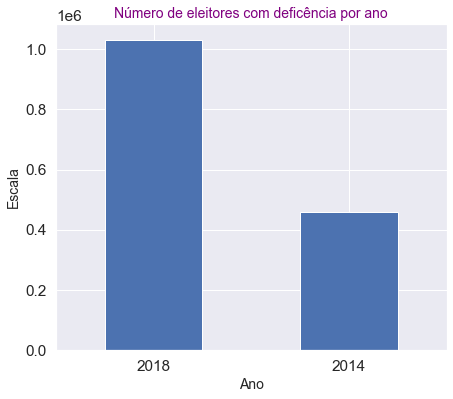

In [46]:
sns.set(font_scale=1.4)
df_total['ano'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0);
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Escala", fontsize=14)
plt.title("Número de eleitores com deficência por ano", y=1, fontsize=14, color="purple");

In [27]:
# Revisando dados duplicados
df_total.duplicated('codigo_eleitor').value_counts()

False    997625
True     492752
dtype: int64

Aqui, vemos que explorar os dados dos dois anos em conjunto pode causar desvios na nossa análise de perfil. Isso porque um número muito grande de códigos de eleitor, que são as identificações de cada pessoa no sistema, aparece como valor único. Se considerarmos que os 492752 valores duplicados correspondem a 246376 códigos repetidos, significa que pouco mais da metade dos códigos de 2014 aparece em 2018. Dessa forma, para fazer uma análise de perfil, preferimos ficar com os dados mais recentes.

### Explorações 

De início, queremos saber qual é a distribuição dos eleitores por tipo de deficiência. Infelizmente, a classificação da Justiça Eleitoral é genérica e não tem divisões suficientes para dar um detalhe mais aprofundado sobre os tipos de deficiência: O tipo 'Outros' aparece com quase metade dos eleitores

In [28]:
#Qual é a distribuição por tipo de deficiência?

defi = perfil_2018["deficiencia"].value_counts()
defi

OUTROS                                  458116
DEFICIÊNCIA DE LOCOMOÇÃO                331490
DEFICIÊNCIA VISUAL                      119407
DEFICIÊNCIA AUDITIVA                     63607
DIFICULDADE PARA O EXERCÍCIO DO VOTO     58455
Name: deficiencia, dtype: int64

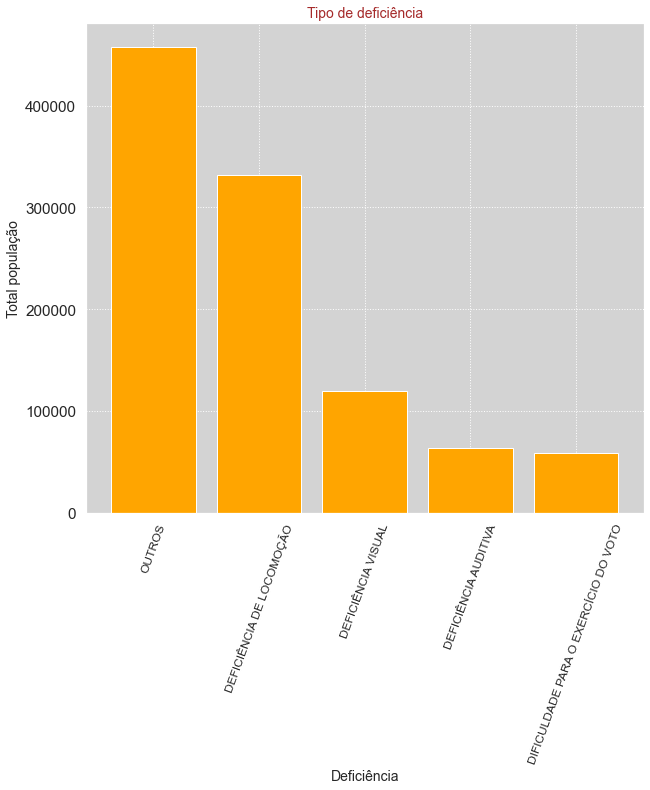

In [52]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.bar(x=defi.index, height=defi, color="orange")
ax.set_xlabel("Deficiência", fontsize=14)
ax.set_ylabel("Total população", fontsize=14)
ax.set_title("Tipo de deficiência", fontsize=14, color="brown");
plt.xticks(rotation="70", fontsize=12)
ax.set_facecolor("lightgrey")
ax.grid(color="white", linestyle='dotted', linewidth=1)
plt.show()

Em seguida, a ideia é saber se há mais eleitores ou eleitoras no registro de pessoas com deficiência da população. As mulheres correspondem a 51% do eleitorado com deficiência, a mesma proporção da população como um todo, conforme mostra o último [Censo brasileiro, de 2010](https://brasilemsintese.ibge.gov.br/populacao/distribuicao-da-populacao-por-sexo.html)

In [30]:
# Distribuição por gênero:
perfil_2018['genero'].unique()

array(['MASCULINO', 'FEMININO', 'NÃO INFORMADO'], dtype=object)

In [31]:
genero_df = perfil_2018["genero"].value_counts()
genero_df.head()

FEMININO         526530
MASCULINO        504406
NÃO INFORMADO       139
Name: genero, dtype: int64

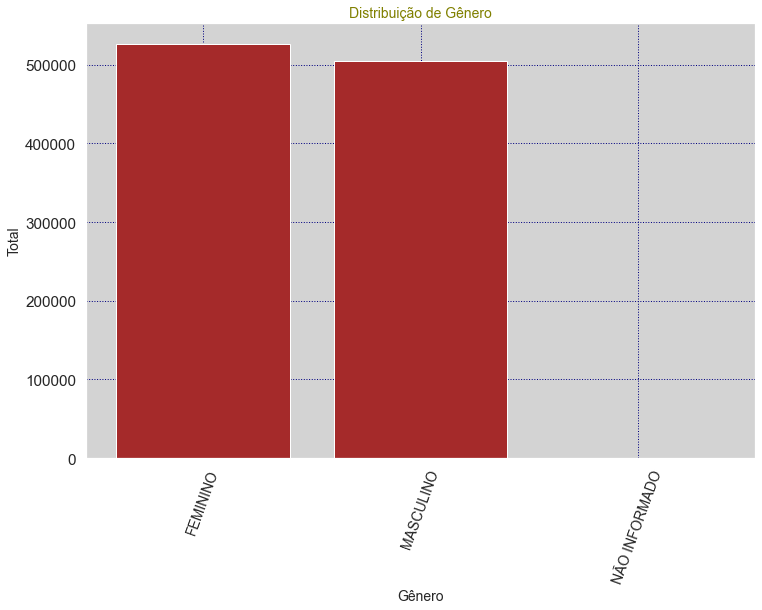

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x=genero_df.index, height=genero_df, color="brown")
ax.set_xlabel("Gênero", fontsize=14)
ax.set_ylabel("Total", fontsize=14)
ax.set_title("Distribuição de Gênero", fontsize=14, color="olive");
plt.xticks(rotation="70", fontsize=14)
ax.set_facecolor("lightgrey")
ax.grid(color="navy", linestyle='dotted', linewidth=1)
plt.show()

**Aqui, analisamos os bancos de dados para saber os estados e municípios brasileiros com maior número de eleitores com deficiência registrados.** Como esperado, o estado e a cidade de São Paulo, os mais populosos do país, tiveram os maiores números em suas categorias. No entanto, o restante da lista mostrou discrepâncias entre população geral e eleitores com deficiência registrado.<br>

**O Paraná, que tem apenas a quinta maior população entre os estados brasileiros, é o segundo com maior número de eleitores com deficiência**. O Ceará, oitavo em população, aparece em quinto na lista, e o Rio Grande do Norte, 17º em população, é o nono em eleitores com deficiência.

**No caso das cidades, as discrepâncias também são notáveis.** Após as duas maiores do Brasil (São Paulo e Rio de Janeiro), aparece Guarulhos(SP), que é apenas a 13ª cidade mais populosa. Belém, o 11º município em população, é o quinto em eleitores com deficiência. E a maior diferença de colocação no top 10, Caxias do Sul (RS), aparece como sexto maior colégio eleitoral de pessoas com deficiência, quando tem apenas a 43ª maior população do Brasil.

In [33]:
# Onde estão registrados os eleitores com deficiência?

top15_uf = perfil_2018["uf"].value_counts().nlargest(15)
top15_uf

SP    351006
PR     83019
MG     70783
RJ     59114
CE     54825
RS     53641
BA     46851
PA     46828
RN     35339
PE     26075
SC     21515
MA     21038
GO     20491
ES     19649
PB     14997
Name: uf, dtype: int64

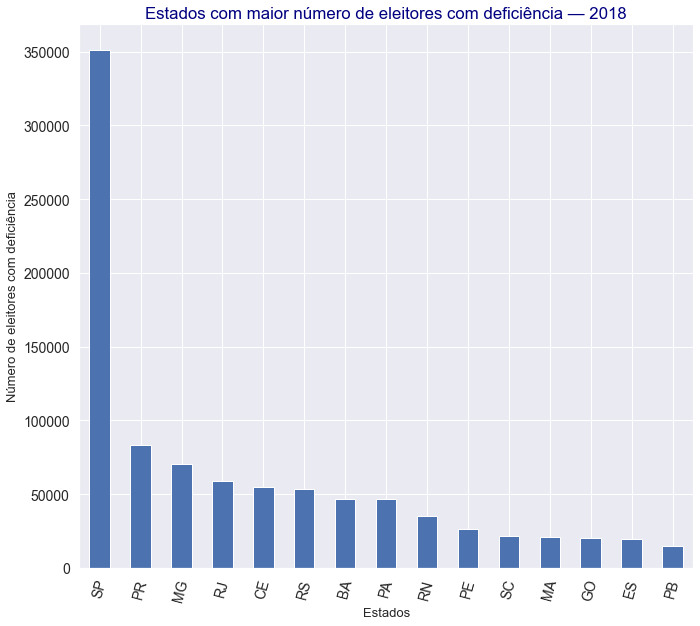

In [68]:
top15_uf.plot(kind="bar", fontsize=14, figsize=(11,10))
plt.xticks(rotation="75")
plt.xlabel("Estados", fontsize=13)
plt.ylabel("Número de eleitores com deficiência", fontsize=13)
plt.title("Estados com maior número de eleitores com deficiência — 2018", y=1, color='navy')
plt.show();

In [35]:
# Quais são as cidades com maior concentração de eleitores com deficiência registrados?

perfil_2018["municipio"].value_counts().nlargest(20)

SÃO PAULO         144522
RIO DE JANEIRO     24862
GUARULHOS          24009
SALVADOR           21022
BELÉM              20658
CAXIAS DO SUL      18656
FORTALEZA          12895
MARINGÁ            12465
BELO HORIZONTE     10935
BRASÍLIA           10704
NITERÓI            10447
SOROCABA            9957
VILA VELHA          9479
NATAL               9366
CAMPO GRANDE        8806
CAMPINAS            8744
CURITIBA            8130
RECIFE              7899
GOIÂNIA             7792
UBERLÂNDIA          7584
Name: municipio, dtype: int64

In [36]:
# Top 10, para visualização de forma mais clara. 

municipios = perfil_2018["municipio"].value_counts().nlargest(10)
municipios

SÃO PAULO         144522
RIO DE JANEIRO     24862
GUARULHOS          24009
SALVADOR           21022
BELÉM              20658
CAXIAS DO SUL      18656
FORTALEZA          12895
MARINGÁ            12465
BELO HORIZONTE     10935
BRASÍLIA           10704
Name: municipio, dtype: int64

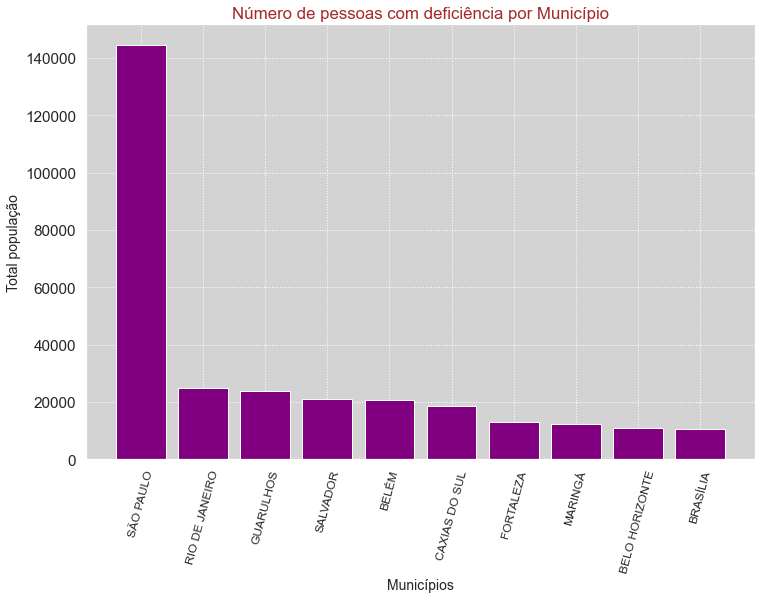

In [74]:
#Visualizando Número de pessoas com deficiência por Município (Top 10)

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x=municipios.index, height=municipios, color="purple")
ax.set_xlabel("Municípios", fontsize=14)
ax.set_ylabel("Total população", fontsize=14)
ax.set_title("Número de pessoas com deficiência por Município", color='brown');
plt.xticks(rotation="75", fontsize=12)
ax.set_facecolor("lightgrey")
ax.grid(color="white", linestyle='dotted', linewidth=1)
plt.show();


In [38]:
# Distribuição de tipo de deficiência por município:

mun_tipo = perfil_2018.groupby(["municipio"])["deficiencia"].value_counts().nlargest(10)
mun_tipo.head(10)

municipio       deficiencia             
SÃO PAULO       OUTROS                      94416
                DEFICIÊNCIA DE LOCOMOÇÃO    37870
GUARULHOS       OUTROS                      18134
CAXIAS DO SUL   OUTROS                      16376
RIO DE JANEIRO  DEFICIÊNCIA DE LOCOMOÇÃO    12879
BELÉM           OUTROS                       9819
SALVADOR        OUTROS                       8938
RIO DE JANEIRO  OUTROS                       8003
SALVADOR        DEFICIÊNCIA DE LOCOMOÇÃO     7837
MARINGÁ         DEFICIÊNCIA DE LOCOMOÇÃO     7262
Name: deficiencia, dtype: int64

### Explorando a escolaridade do perfil de eleitores com deficiência

Analisando os dados do perfil do eleitorado com deficiência, **é possível notar que a maioria dos registrados tem baixos níveis de escolaridade**, com quase 30% com ensino fundamental incompleto, 18% de analfabetos, 13% lêem e escrevem. Apenas 16% concluíram o ensino médio e 8,6% concluíram o ensino superior. Também analisamos possíveis correlações entre o tipo de deficiência e escolaridade

In [39]:
# Explorando o nível de escolaridade do perfil do eleitor com deficiência

perfil_2018['escolaridade'].describe()

count                           1031075
unique                                9
top       ENSINO FUNDAMENTAL INCOMPLETO
freq                             293060
Name: escolaridade, dtype: object

In [40]:
escolaridade_ = perfil_2018['escolaridade'].value_counts().nlargest(10)
escolaridade_

ENSINO FUNDAMENTAL INCOMPLETO    293060
ANALFABETO                       180213
ENSINO MÉDIO COMPLETO            162773
LÊ E ESCREVE                     136376
SUPERIOR COMPLETO                 86456
ENSINO FUNDAMENTAL COMPLETO       81058
ENSINO MÉDIO INCOMPLETO           65220
SUPERIOR INCOMPLETO               25752
NÃO INFORMADO                       167
Name: escolaridade, dtype: int64

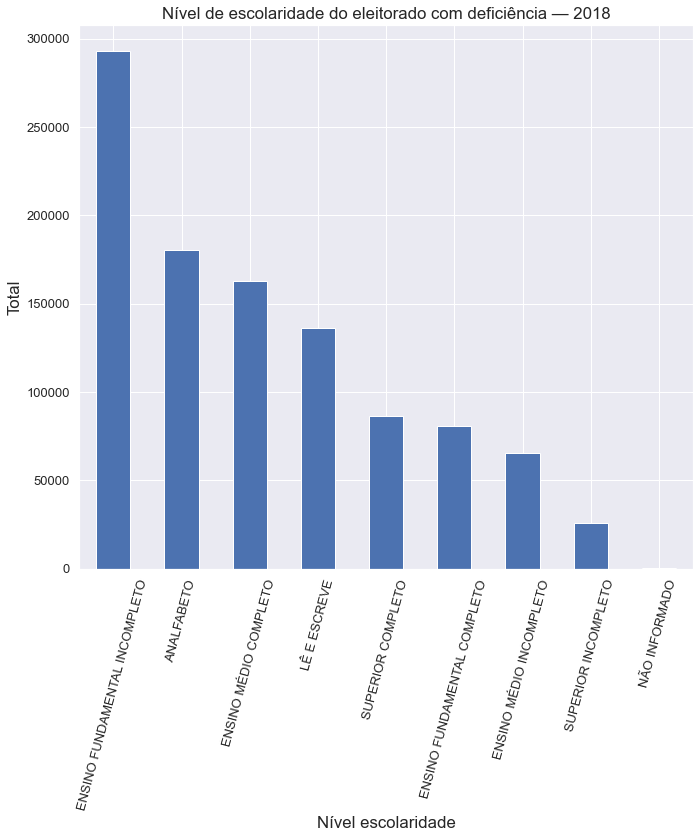

In [77]:
escolaridade_.plot(kind="bar", fontsize=13, figsize=(11,10), rot=0)
plt.xlabel("Nível escolaridade")
plt.ylabel("Total")
plt.xticks(rotation="75", fontsize=13)
plt.title("Nível de escolaridade do eleitorado com deficiência — 2018", y=1)
plt.show();

In [42]:
# Distribuição de nível de escolaridade por tipo de deficiência:

escol_tipo = perfil_2018.groupby(["escolaridade"])["deficiencia"].value_counts().nlargest(10)
escol_tipo.tail(5)

escolaridade                 deficiencia             
LÊ E ESCREVE                 OUTROS                      50642
ANALFABETO                   DEFICIÊNCIA DE LOCOMOÇÃO    45525
SUPERIOR COMPLETO            OUTROS                      45122
LÊ E ESCREVE                 DEFICIÊNCIA DE LOCOMOÇÃO    42693
ENSINO FUNDAMENTAL COMPLETO  OUTROS                      37754
Name: deficiencia, dtype: int64

## Conclusão

**Uma análise preliminar dos dados do perfil de eleitores com deficiência em 2018 mostra que temos diversas questões possíveis para aprofundar**.<br><br>
-Por que há a discrepância entre as populações de Estados e municípios e os eleitores com deficiência registrados? Está faltando registro desse público em outras cidades populosas? Há problemas de acesso para essas pessoas participarem do processo eleitoral?<br><br>
-É possível também analisar mais a fundo os problemas em relação ao acesso à educação, cruzando com dados da PNAD contínua, por exemplo.<br><br>
-Também pode ser analisado o crescimento ano a ano do número de registros, o comparecimento nas eleições e as condições de zonas eleitorasi para acessibilidade, de maneira que os eleitores possam exercer seus direitos democráticos.